# NEOExchange Observations Planner - The Speedy, No-Fuss Version!
**Developer:** Aayushi Verma

**Aim**: this code outputs an object visibility chart, similar to StarAlt (http://catserver.ing.iac.es/staralt/), and an alt-az chart.

This code is optimised to be used for NEOExchange objects (https://neoexchange.lco.global/), however can be used for any astronomical object at any observatory.

In [1]:
#importing useful packages
import numpy as np
import matplotlib.pyplot as plt
#---
from astropy import units as u
from astropy.time import Time
from astropy.table import Table
from astropy.coordinates import get_sun, get_moon, SkyCoord, EarthLocation, AltAz
#---
from astroplan import plots, observability_table
from astroplan import Observer, FixedTarget
from astroplan import AltitudeConstraint, AirmassConstraint, AtNightConstraint
from astroplan import is_observable, is_always_observable, months_observable
#---
from astroquery.jplhorizons import Horizons
#---
import os
import pytz
from pathlib import Path

# initialising starting directory
code_home_path = "C://Users//aayus//OneDrive - University of Canterbury//ASTR391 Research Project//Code//Obs Planning Code//NEOExchange-Observations-Planner"
os.chdir(code_home_path) #from now on, we are in this directory

# importing functions
from obs_plan_funcs import *

plots_save_path = Path("C://Users//aayus//OneDrive - University of Canterbury//ASTR391 Research Project//Code//Obs Planning Code//NEOExchange-Observations-Planner//Plots/")

## 1. Input your observation session parameters here.

First, enter observation time parameters.

In [2]:
# specify your timezone in UTC
utc_offset = +13 * u.hour  # New Zealand Standard Time

# define observation dates to show on object visibility plots
obs_dates_display = '22/11 - 4/12'
obs_dates_save = '22Nov-4Dec'

# enter the start and end dates of your observing run
obs_start_date   = '2021-11-22'   #YYYY-MM-DD
obs_end_date     = '2021-12-04'   #YYYY-MM-DD

# enter the start and end time of your night
night_start_time = '20:30:00'     #HH:MM:SS
night_end_time   = '06:00:00'     #HH:MM:SS

Next, input your list of targets. 
* `targets_file` - This should be a `.txt` text file with the names of your targets. See the sample targets file, `sample_targets.txt`, for formatting. Ensure the target names are as specific as possible, otherwise an error will be thrown. These targets are queried on the JPL Horizons database (https://ssd.jpl.nasa.gov/horizons.cgi), so if in doubt, check your object on the database first.

In [13]:
# enter the name of the targets list
targets_file = "nov.txt"

## 2. Run the code.

No need to change anything, unless you need to.

In [5]:
# enter observation run dates and the time interval you need data for 
# generally you won't need to change the start and stop times, but change the step time if you need to
epoch_dates = {'start':obs_start_date, 'stop':obs_end_date,'step':'15m'} #YYYY-MM-DD

# defining the observing location parameters
latitude = -43.29 * u.deg
longitude = 170.27 * u.deg
elevation = 1029 * u.m

# enter the location code of your observatory
obs_location_code = 474

# defining the limiting altitude of the telescope, i.e. the minimum altitude possible.
lim_alt = 30 #degrees

# setting observing constraints
# altitude range of the telescope
min_alt = 30 * u.deg
max_alt = 90 * u.deg

# max airmass allowed
max_airmass = 5

# your definition of nighttime period for your observations
# by default we will take this to be between civil twilights
# change if needed
nighttime = AtNightConstraint.twilight_civil()

In [8]:
# defining the time range of the observation period
obs_start_time, obs_end_time, midnight = obs_times(obs_start_date,obs_end_date,night_start_time,night_end_time,utc_offset)
obs_location, observatory, obs_time_range = obs_stuff(longitude, latitude, elevation, obs_start_time, obs_end_time)
target_names = file_reader(targets_file)
target_names_mini_lsts = np.array_split(target_names, 3)

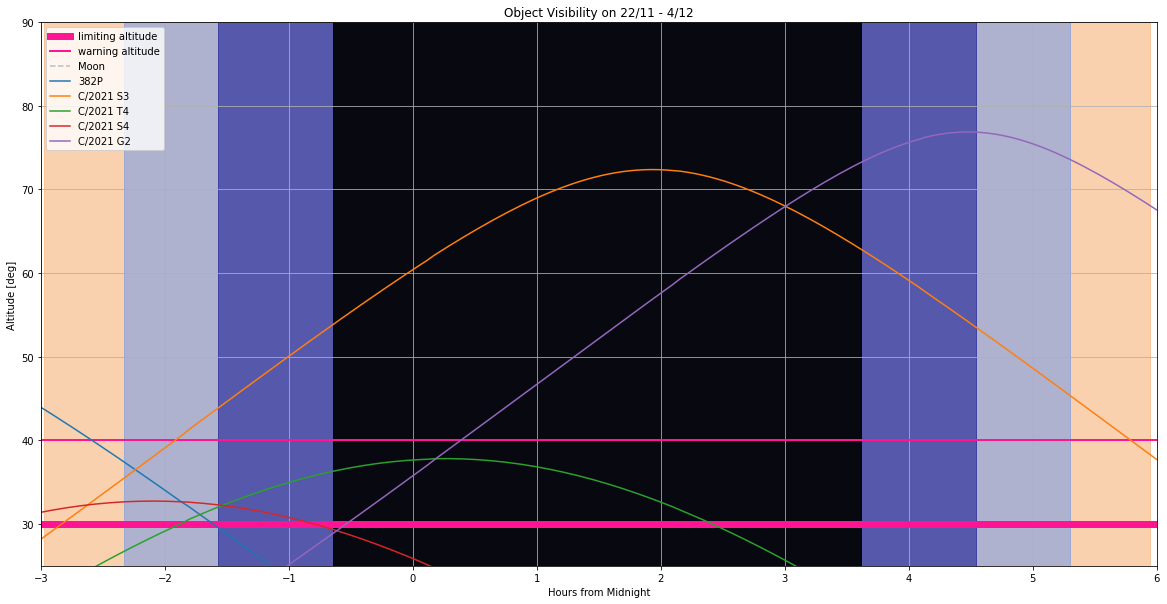

C:\Users\aayus\AppData\Local\Programs\Python\Python39\lib\site-packages\astroplan\plots\sky.py:120: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = plt.gca(projection='polar')


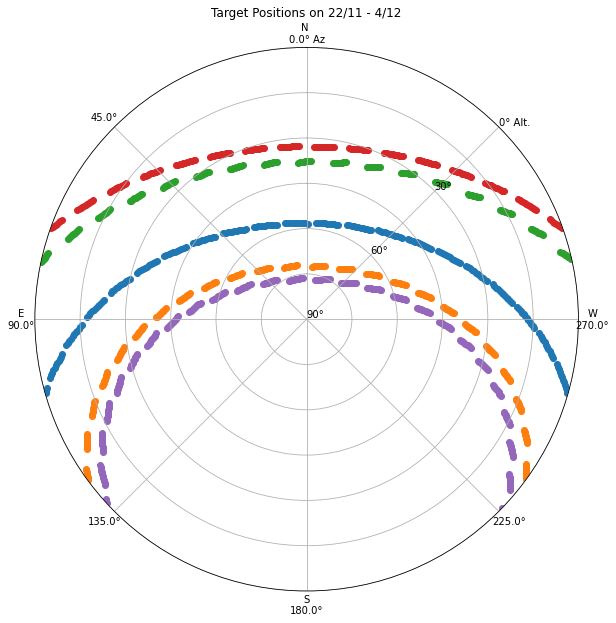

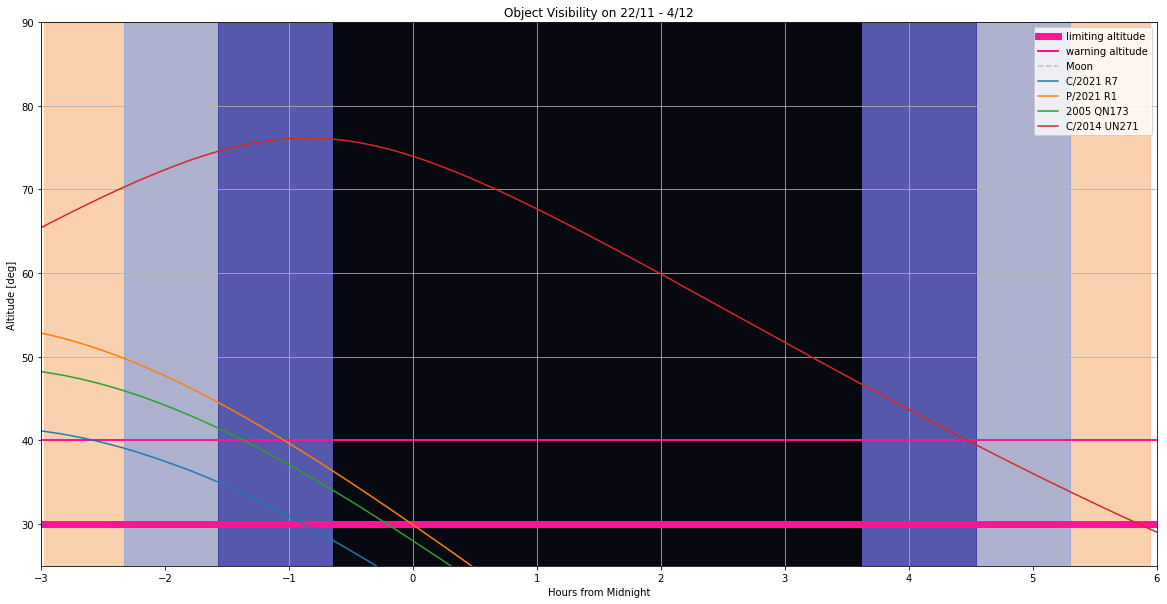

C:\Users\aayus\AppData\Local\Programs\Python\Python39\lib\site-packages\astroplan\plots\sky.py:120: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = plt.gca(projection='polar')


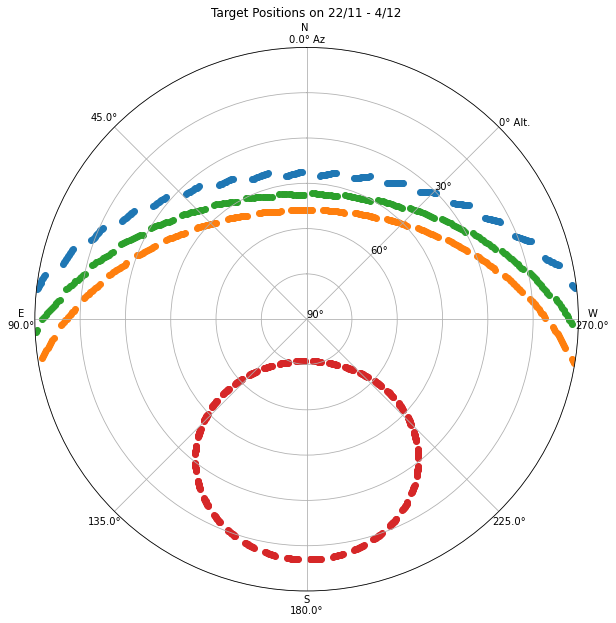

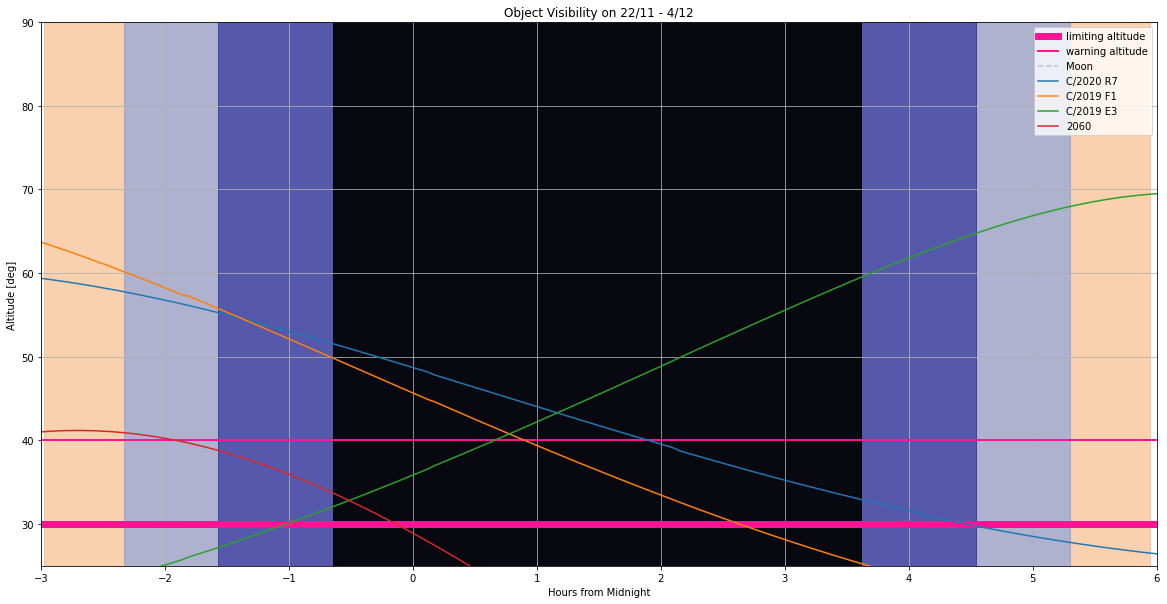

C:\Users\aayus\AppData\Local\Programs\Python\Python39\lib\site-packages\astroplan\plots\sky.py:120: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = plt.gca(projection='polar')


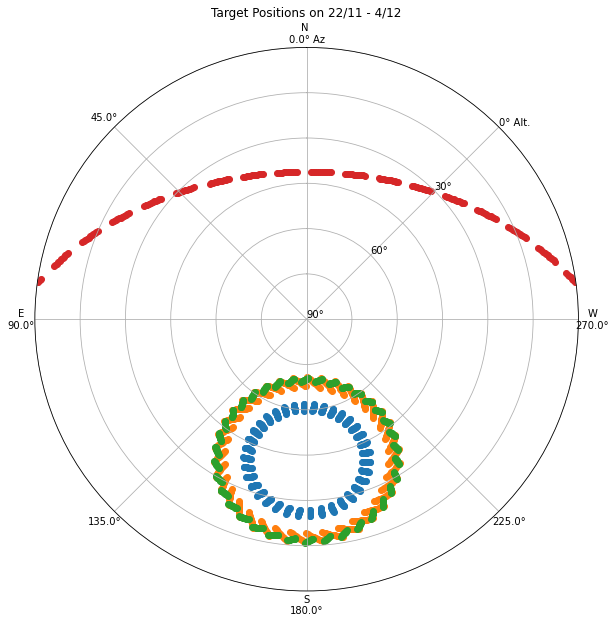

In [11]:
for i in range(len(target_names_mini_lsts)):
    # querying the JPL Horizons database for RA/DEC, airmass, Alt/Az, and magnitude information for your targets
    target_info = jpl_querier(target_names_mini_lsts[i],obs_location_code,epoch_dates)
    # generating SkyCoord and FixedObject objects for your targets for calculation purposes
    skycoord_targets_lst, fixed_targets_lst = coord_obs(target_info)
    delta_midnight, sunaltazs, moonaltazs, target_altazs = altaz_info(skycoord_targets_lst,midnight,obs_location)
    # calculations for Target Position Plot
    dt = obs_time_range[1] - obs_time_range[0]
    target_position_plot_times = obs_time_range[0] + dt * np.linspace(0,1,len(skycoord_targets_lst[0]))

    # plots
    zeroLine_x1, zeroLine_y1, zeroLine_y2 = zerolines(lim_alt)
    plot_alt(lim_alt,delta_midnight,sunaltazs,moonaltazs,target_altazs,target_names_mini_lsts[i],plots_save_path,obs_dates_display,obs_dates_save,i)
    plot_target_position(fixed_targets_lst,observatory,target_position_plot_times,plots_save_path,obs_dates_display,obs_dates_save,i)